In [1]:
import pandas as pd
import datetime 

In [2]:
df = pd.read_csv('aud-sgd-2017-2019.csv', names=['month','day','year','sgd_exchange_rate'], delim_whitespace=True,
                dtype={'day': 'object','year': 'object'})
df.index = df.apply(lambda se: datetime.datetime.strptime(se.month + se.day + se.year, '%b%d%Y'), axis=1)
df = df[['sgd_exchange_rate']]
df

sgd_exchange_rate
2019-12-31             0.9444
2019-12-30             0.9434
2019-12-27             0.9435
2019-12-26             0.9405
2019-12-25             0.9377
...                       ...
2017-01-06             1.0506
2017-01-05             1.0479
2017-01-04             1.0489
2017-01-03             1.0479
2017-01-02             1.0425

[782 rows x 1 columns]

In [3]:
number_of_days = 365 * 3

In [4]:
dti = pd.date_range('2017-01-01', periods=number_of_days, freq='D')
df_full = pd.DataFrame([x for x in range(number_of_days)], dti, columns=['delme'])
df = df.merge(df_full, how='right' ,left_index=True, right_index=True, validate='one_to_one')
del df['delme']
df.sgd_exchange_rate.fillna(method='bfill', inplace=True)
df

sgd_exchange_rate
2017-01-01             1.0425
2017-01-02             1.0425
2017-01-03             1.0479
2017-01-04             1.0489
2017-01-05             1.0479
...                       ...
2019-12-27             0.9435
2019-12-28             0.9434
2019-12-29             0.9434
2019-12-30             0.9434
2019-12-31             0.9444

[1095 rows x 1 columns]

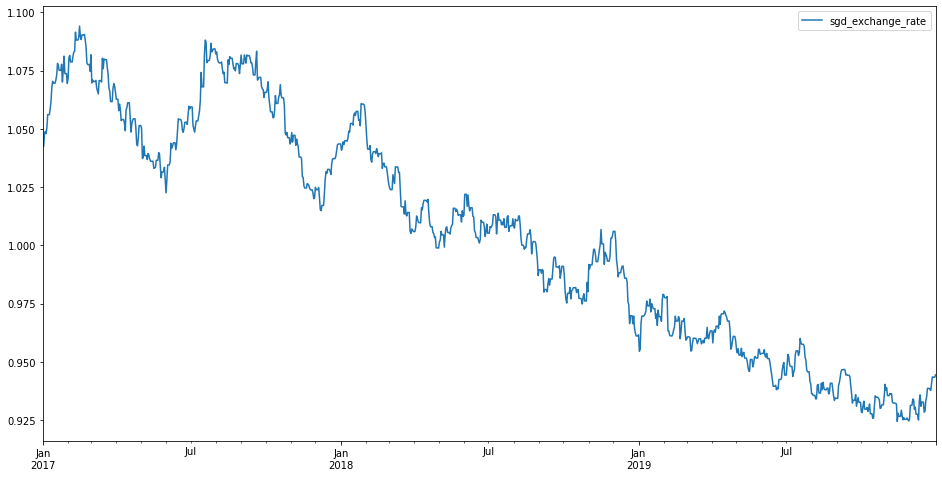

In [5]:
df.plot(figsize=(16,8))

In [6]:
df.to_csv('other-features/aud-sgd-exchange_rate_2017-2019.csv',index_label='date')